<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
show_id            0
type               0
title              0
dire

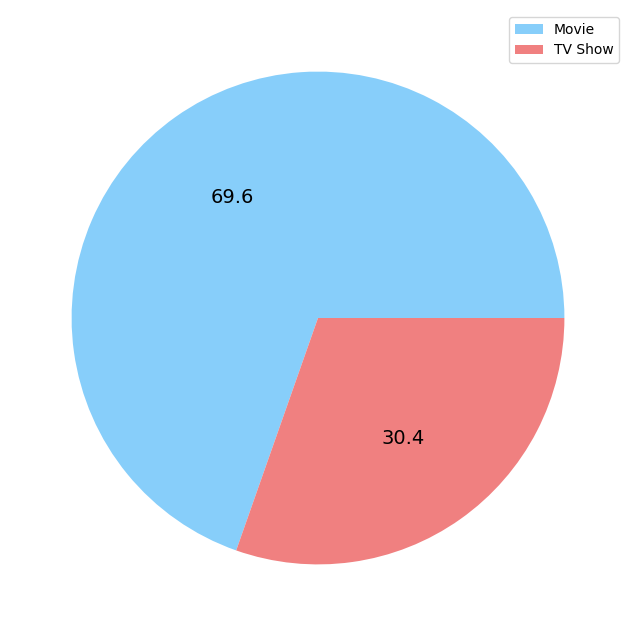

/tmp/ipython-input-3182337423.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="release_year", data=last_ten_year, palette="viridis");


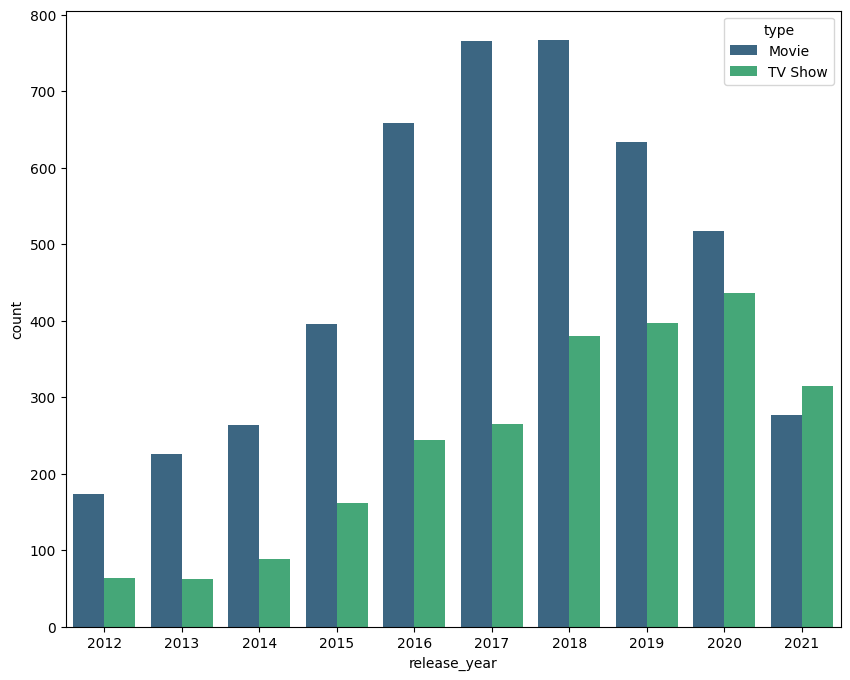

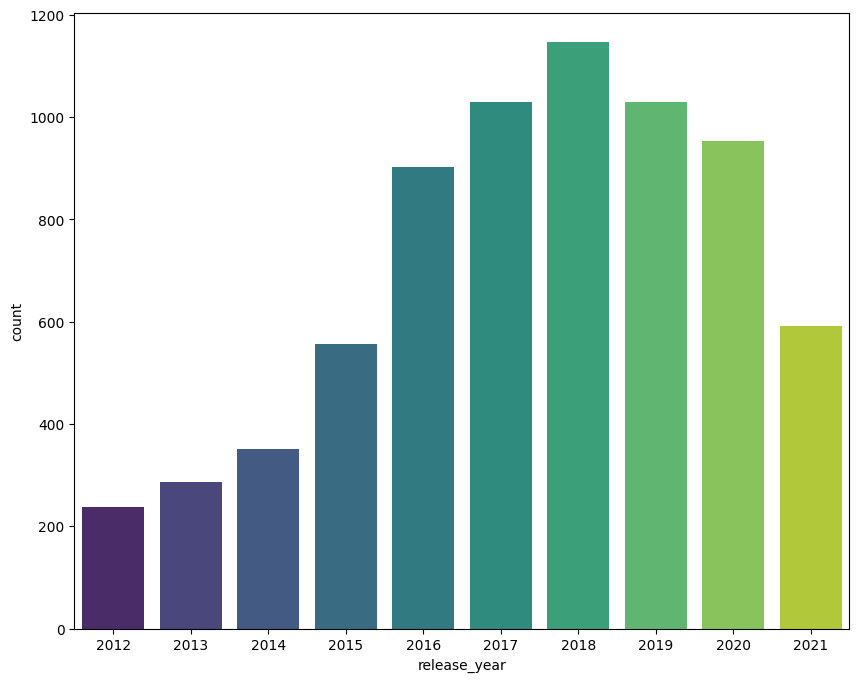

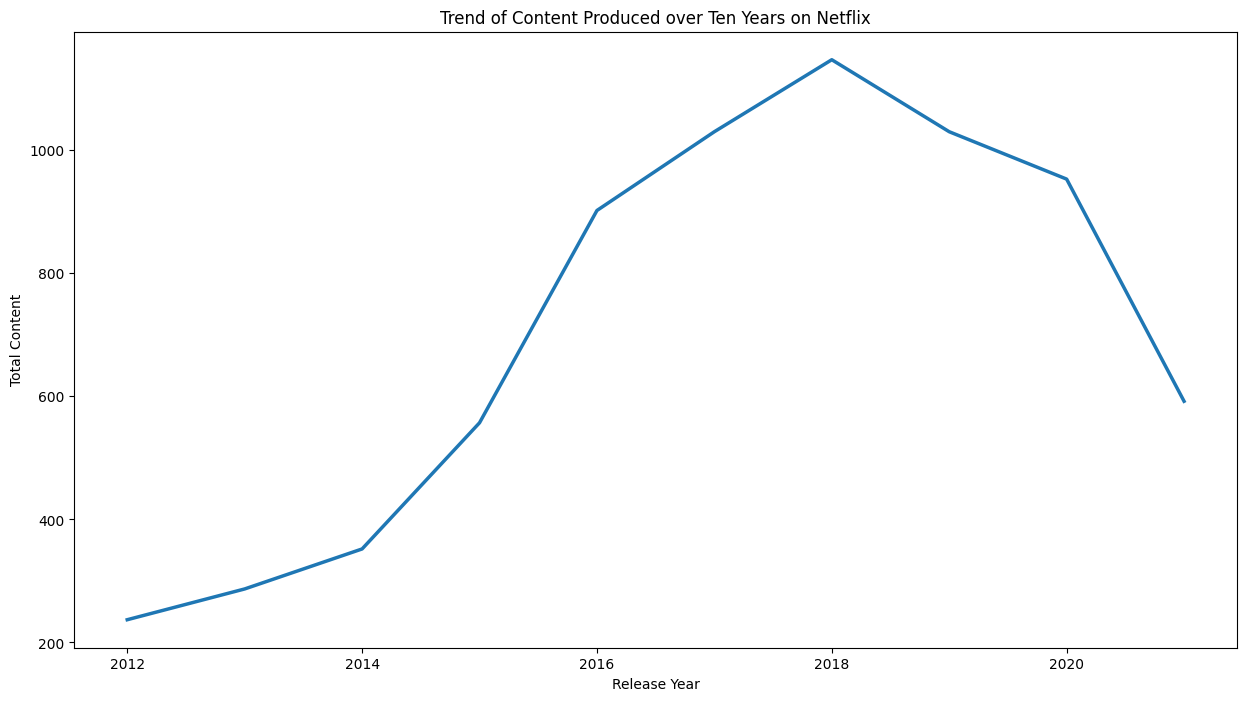

Result : When the last ten years are examined, it is seen that the most popular year of Netflix content is 2018. After 2018, the popularity of netflix content is decreasing.
---------------------------------------------------------------------
It has been observed that Netflix has the most content for Mature Audience.
-------------------------------------------------------------------


/tmp/ipython-input-3182337423.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating",data=netflix,palette="viridis")
/tmp/ipython-input-3182337423.py:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(netflix.country.value_counts()[:15].index,rotation=45)


While the most content is produced in the USA, India follows in the second country.


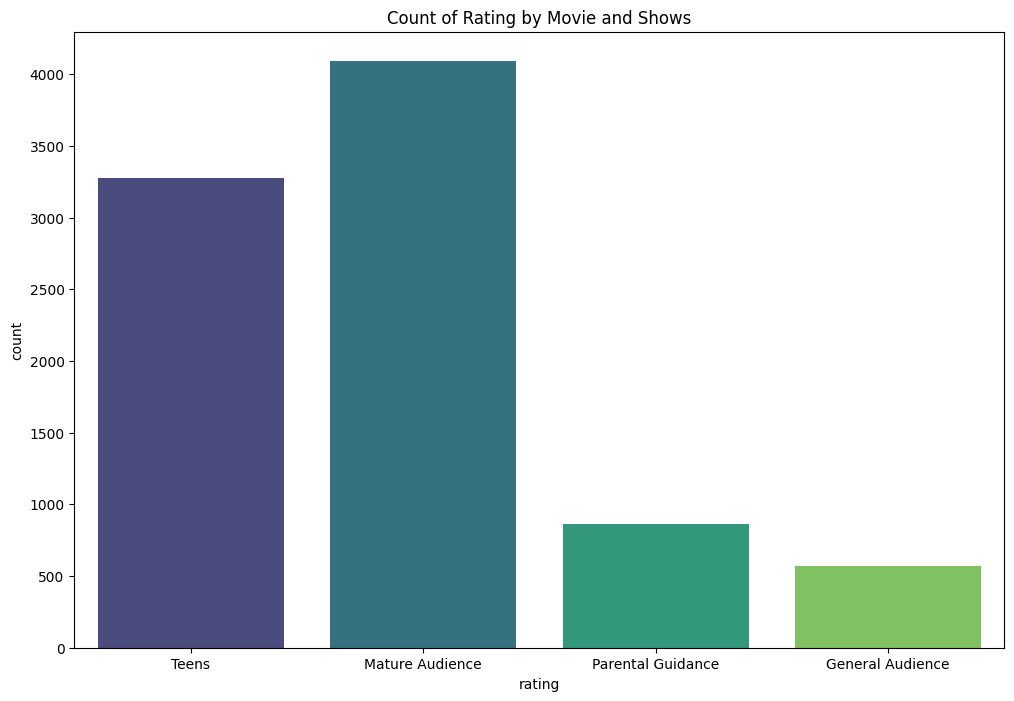

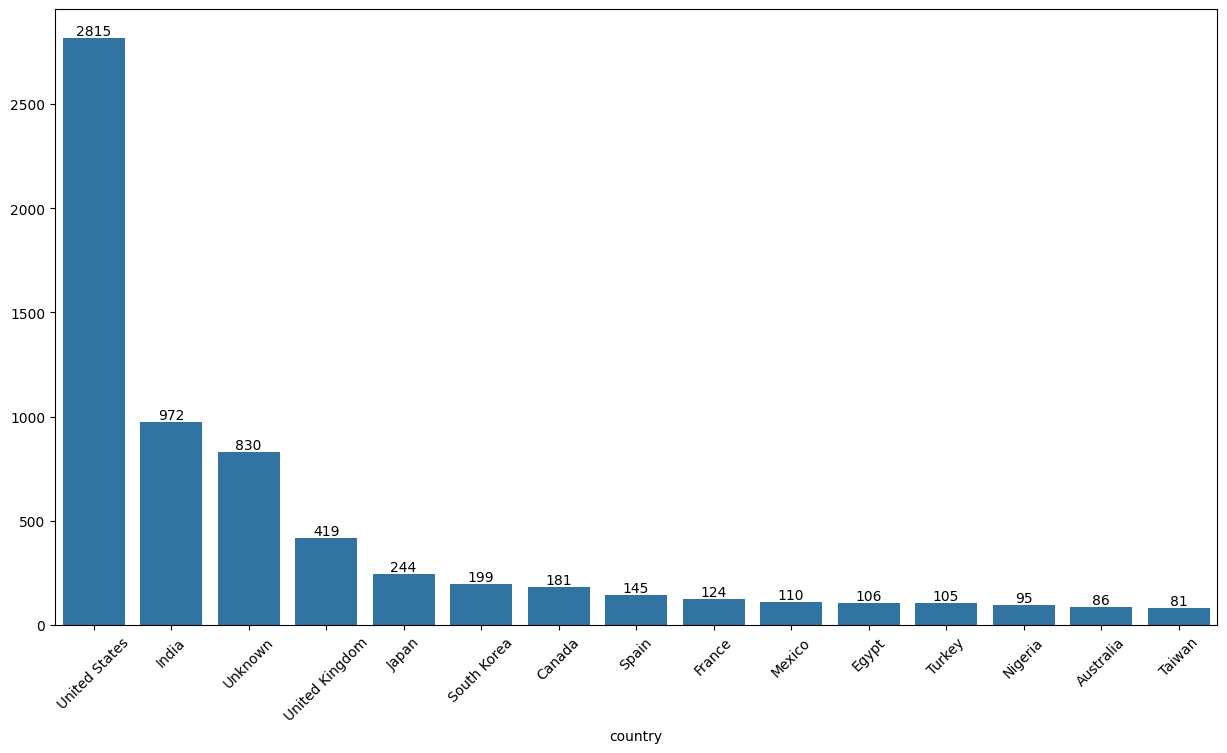

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

netflix = pd.read_csv("/content/netflix_titles.csv")

print(netflix.info())

print(netflix.describe())

# Count of missing values per column
print(netflix.isnull().sum())

# Fill missing values in categorical columns with 'Unknown'
netflix['director'] = netflix['director'].fillna("Unknown")
netflix['cast'] = netflix['cast'].fillna("Unknown")
netflix['country'] = netflix['country'].fillna("Unknown")
netflix['date_added'] = netflix['date_added'].fillna("Unknown")

# Display first few rows of the cleaned data
print(netflix.head())

# Verify no missing values remain in these columns
print(netflix.isnull().sum())

netflix.dropna(inplace=True)
netflix.isnull().sum()

netflix.rating.value_counts()
netflix.type.value_counts()
netflix.type.value_counts().index
netflix.type.unique

#pie chart - The number of Movie content on Netflix is 2.33 times the TV Show content.
plt.figure(figsize=(10, 8))

plt.pie(netflix.type.value_counts(), labels = netflix.type.value_counts().index, labeldistance=None, autopct="%.1f",textprops={'fontsize': 14},colors=['lightskyblue', 'lightcoral'])
plt.legend()
plt.show()

#director count or unknown
netflix.director.value_counts()

#Release Year
last_ten_year=netflix[["type","release_year"]]
last_ten_year=last_ten_year[last_ten_year["release_year"] >=2012]
last_ten_year

last_ten_year.groupby("release_year")["type"].value_counts()


last_ten_year_df =last_ten_year.groupby("release_year")["type"].size().reset_index()
last_ten_year_df = pd.DataFrame(last_ten_year_df)
last_ten_year_df

last_ten_year_df.rename(columns={"type" : "Total Content"},inplace=True)
last_ten_year_df

#plot graph
plt.figure(figsize=(10,8))
sns.countplot(x="release_year", data=last_ten_year, hue="type", palette="viridis");



plt.figure(figsize=(10,8))
sns.countplot(x="release_year", data=last_ten_year, palette="viridis");



plt.figure(figsize=(15, 8))
ax = sns.lineplot(x="release_year",y="Total Content",data=last_ten_year_df, linewidth=2.5)
ax.set(xlabel='Release Year', ylabel='Total Content', title='Trend of Content Produced over Ten Years on Netflix')
plt.show()
print("Result : When the last ten years are examined, it is seen that the most popular year of Netflix content is 2018. After 2018, the popularity of netflix content is decreasing.")

print("---------------------------------------------------------------------")

#RATING
netflix.rating.unique()
new_categories = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
netflix["rating"] = netflix['rating'].replace(new_categories)
netflix.head()

plt.figure(figsize=(12,8))
sns.countplot(x="rating",data=netflix,palette="viridis")
plt.title("Count of Rating by Movie and Shows");

print("It has been observed that Netflix has the most content for Mature Audience.")
print("-------------------------------------------------------------------")


#Countries

Top_15_Country=netflix.country.value_counts().head(15)
Top_15_Country = pd.DataFrame(Top_15_Country)
Top_15_Country

plt.figure(figsize=(15,8))

ax=sns.barplot(x=netflix.country.value_counts()[:15].index , y=netflix.country.value_counts()[:15].values )
ax.set_xticklabels(netflix.country.value_counts()[:15].index,rotation=45)
for i in ax.containers:
    ax.bar_label(i);

print("While the most content is produced in the USA, India follows in the second country.")